In [15]:
import cv2 
import numpy as np 
import os 
from random import shuffle                        
from keras.models import Sequential                
from keras.layers import Convolution2D           
from keras.layers import MaxPooling2D              
from keras.layers import Flatten                   
from keras.laye`    rs import Dense                     
from keras.layers import Dropout                    
from keras.preprocessing import image             
import matplotlib.pyplot as plt                    
import warnings#
warnings.filterwarnings('ignore')
import os
print(os.listdir("C:\\Users\\nitesh\\Desktop\\cat"))


['.ipynb_checkpoints', 'cat-and-dog.zip', 'cat.ipynb', 'catanddog.ipynb', 'test_set', 'training_set']


In [3]:
TRAIN_DIR = 'training_set/training_set'
TEST_DIR = 'test_set/test_set'
IMG_SIZE = 64,64

In [4]:
image_names = []
data_labels = []
data_images = []

In [5]:
def  create_data(DIR):
     for folder in os.listdir(TRAIN_DIR):
        for file in os.listdir(os.path.join(TRAIN_DIR,folder)):
            if file.endswith("jpg"):
                image_names.append(os.path.join(TRAIN_DIR,folder,file))
                data_labels.append(folder)
                img = cv2.imread(os.path.join(TRAIN_DIR,folder,file))
                im = cv2.resize(img,IMG_SIZE)
                data_images.append(im)
            else:
                continue


In [6]:
#calling functions to create data
create_data(TRAIN_DIR)
create_data(TEST_DIR)

In [7]:
data = np.array(data_images)

In [8]:
len(data_images)

16010

In [9]:
data.shape

(16010, 64, 64, 3)

In [10]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils

le = LabelEncoder()
label = le.fit_transform(data_labels)

In [11]:
from sklearn.model_selection import train_test_split

X_train,X_val,y_train,y_val=train_test_split(data,label,test_size=0.20,random_state=42)

print("X_train shape",X_train.shape)
print("X_test shape",X_val.shape)
print("y_train shape",y_train.shape)
print("y_test shape",y_val.shape)

X_train shape (12808, 64, 64, 3)
X_test shape (3202, 64, 64, 3)
y_train shape (12808,)
y_test shape (3202,)


In [12]:
classifier=Sequential()
classifier.add(Convolution2D(32, 3, 3, input_shape = (64, 64, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Dropout(0.5))
classifier.add(Flatten())
classifier.add(Dense(output_dim= 128, activation='relu'))
classifier.add(Dense(output_dim= 1, activation='sigmoid'))
classifier.compile(optimizer= 'adam', loss= 'binary_crossentropy', metrics= ['accuracy'])
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 31, 31, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 30752)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               3936384   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 3,937,409
Trainable params: 3,937,409
Non-trainable params: 0
____________________________________________

In [13]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen=ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

train_datagen.fit(X_train)

In [16]:
batch_size = 32
steps_per_epoch=len(X_train)
validation_steps=len(y_val)

history=classifier.fit_generator(
    train_datagen.flow(X_train,y_train, batch_size=batch_size),
    steps_per_epoch = steps_per_epoch,
    epochs = 4,
    verbose = 2,
    validation_data = (X_val,y_val),
    validation_steps = validation_steps)

Epoch 1/4
 - 2996s - loss: 0.4077 - accuracy: 0.8086 - val_loss: 310.0349 - val_accuracy: 0.6299
Epoch 2/4
 - 3381s - loss: 0.2125 - accuracy: 0.9134 - val_loss: 664.0178 - val_accuracy: 0.5899
Epoch 3/4
 - 2848s - loss: 0.1337 - accuracy: 0.9494 - val_loss: 932.0164 - val_accuracy: 0.5768
Epoch 4/4
 - 2579s - loss: 0.0978 - accuracy: 0.9646 - val_loss: 1300.1985 - val_accuracy: 0.5515


In [19]:
classifier.save_weights('model.h5')


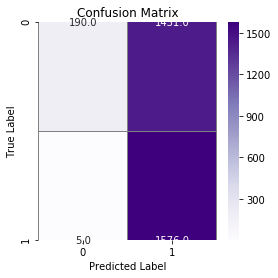

In [20]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

pred = classifier.predict_classes(X_val)
cm = confusion_matrix(y_val,pred)

f,ax = plt.subplots(figsize=(4, 4))
sns.heatmap(cm, annot=True, linewidths=0.01,cmap="Purples",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [21]:
accuracy=(cm[0][0]+cm[1][1])/len(y_val)
print(accuracy)

0.551530293566521


In [34]:
import numpy as np
from keras.preprocessing import image


test_image=image.load_img('test_set/test_set/dogs/dog.4043.jpg',target_size=(64,64))
#test_image=image.load_img('test_set/test_set/cats/cat.4001.jpg',target_size=(64,64))

test_image=image.img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)
result=classifier.predict_classes(test_image)

if result[0][0] >=0.5:
    prediction='dog'
else:
    prediction='cat'
print(prediction)

dog
